# **DATOS FALTANTES, DATOS CATEGÓRICOS, PIPELINES Y CROSSVALIDATION**

##Accuracy y Cross-Entropy

El ***accuracy*** es una de varias métricas que se usan para medir el éxito de un problema de clasificación. Es la relación entre las predicciones correctas y el total de predicciones: `accuracy = númeroCorrecto / total`.  Un modelo que siempre predice correctamente debería tener un accuracy de `1.0`. Se usa cuando las clases en el dataset ocurren con igual frecuencia.

El accuracy y la mayoría de las métricas de clasificación no pueden usarse como función loss, ya que la SGD (*Stochastic Gradient Descent*) necesita que los cambios sean suaves, pero el accurancy cambia bruscamente. El substituto es la función *cross-entropy*. 

Recordemos que la función loss define el objetivo de la ANN durante el entrenamiento cuando la meta era minimizar la distancia entre la salida esperada y la salida predecida. Esta distancia se media con MAE.

En la clasificación, se requiere de una distancia entre *probabilidades*. **Croos-entropy** mide la distancia entre dos distribuciones de probabilidad.

La idea es que la red prediga la clase correcta con una probabilidad de 1.0. Mientras más lejos del 1.0 sea la probabilidad, mayor será el cross-entropy.

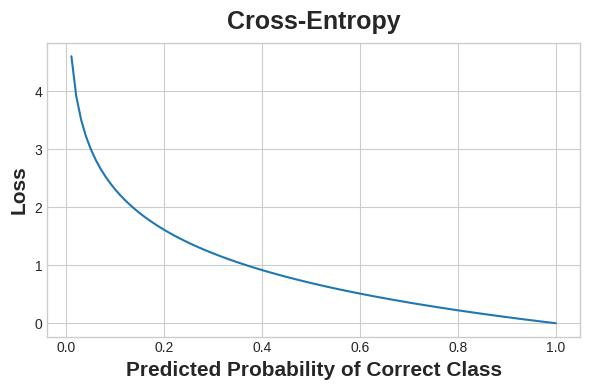

##**Probabilidades con la función sigmoide**

El accuracy y la cross-entropy requieren probabilidades como entrada, es decir números entre 0 y 1. Para convertir las salidas producidas por una capa densa en probabilidades, se agrega una nueva clase de función de activación, la **activación sigmoide**, que mapea números reales en el intervalo [0,1].

Para obtener la clase de predicción final, se define una probablidad 
*threshold* (umbral). Por lo general es 0.5, que por redondeo nos dará la clase correcta: menos de 0.5 significa que la clase tendrá etiqueta 0 y más de .5, que la clase tendrá etiqueta 1. Keras usa 0.5 por default.

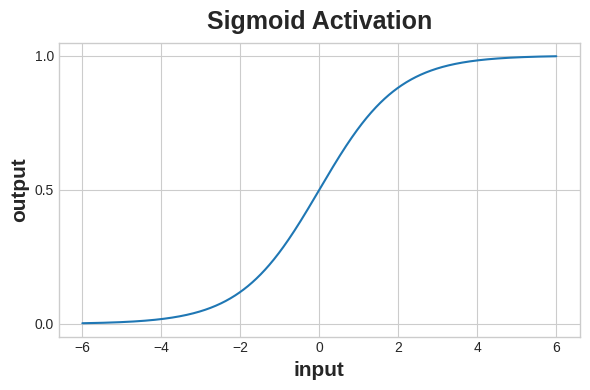

La función sigmoide mapea números reales en el intervalo [0,1]

Definamos el modelo de la misma forma que lo habíamos realizado con las tareas de regresión, con una excepción: la capa final incluye una activación 'sigmoid' de tal forma que la salida será una probabilidad. 

#Imputar datos faltantes usando sklearn

Imputar/reemplazar datos faltantes numericos y categóricos

El manejo de valores faltantes es una parte clave en el preprocesamiento de los datos, hay diferentes técnicas para reemplazar los valores faltantes con valores apropiados.



In [1]:
import pandas as pd
import numpy as np

estudiantes = [[85, 'M', 'muybien'],
           [95, 'F', 'excelente'],
           [75, None,'bien'],
           [np.NaN, 'M', 'suficiente'],
           [70, 'M', 'bien'],
           [np.NaN, None, 'muybien'],
           [92, 'F', 'muybien'],
           [98, 'M', 'excelente']]

dfstd = pd.DataFrame(estudiantes)
dfstd.columns = ['calif', 'género', 'result']

In [2]:
dfstd

,calif,género,result
0,85.0,M,muybien
1,95.0,F,excelente
2,75.0,None,bien
3,NaN,M,suficiente
4,70.0,M,bien
5,NaN,None,muybien
6,92.0,F,muybien
7,98.0,M,excelente


Hay dos columnas/características (una numérica calif y otra categórica género) con valores faltantes y requieren ser imputadas. 


Para manejarlas se usa una instancia de `SimpleImputer`

In [ ]:
from sklearn.impute import SimpleImputer

# Valores faltantes representados con NaN  

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
dfstd.calif = imputer.fit_transform(dfstd['calif'].values.reshape(-1,1))[:,0]

dfstd

,calif,género,result
0,85.000000,M,muybien
1,95.000000,F,excelente
2,75.000000,None,bien
3,85.833333,M,suficiente
4,70.000000,M,bien
5,85.833333,None,muybien
6,92.000000,F,muybien
7,98.000000,M,excelente


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##SimpleImputer para imputar datos numéricos faltantes


```
#Imputar con el promedio
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

#Imputar con la mediana
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

# Imputar con la moda
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

# Imputar con un valor constante
imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=80)
```




##SimpleImputer para imputar datos categóricos faltantes

Se pueden usar las estrategias 'most_frequent' y 'constant'. La más usada es 'most_frequent'.


In [3]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
dfstd.género = imputer.fit_transform(dfstd['género'].values.reshape(-1,1))[:,0]

dfstd

NameError: ignored

In [ ]:
#Para ponerle un determinado valor

imputer = SimpleImputer(missing_values=None, strategy='constant', fill_value='F')
dfstd.género = imputer.fit_transform(dfstd['género'].values.reshape(-1,1))[:,0]

dfstd

,marks,gender,result
0,85.0,M,muybien
1,95.0,F,excellent
2,75.0,F,good
3,NaN,M,average
4,70.0,M,good
5,NaN,F,verygood
6,92.0,F,verygood
7,98.0,M,excellent


#Pipelines

Los pipelines permiten organizar el código. Especificamente un pipeline agrupa los pasos de preprocesamiento y modelado como si fueran uno solo.

Para construir un pipeline:

1. Definir los pasos del preprocesamiento (imputar valores faltantes)
2. Definir el modelo
3. Crear y evaluar el pipeline



#Ejercicios

Se construirá un modelo para predicción de cancelaciones de hotel con un clasificador binario y el dataset [hotel cancellations](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

**Paso 1:** Leer el dataset y mostrar los 5 primeros renglones

In [4]:
import pandas as pd
path = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/hotel.csv"
hotel = pd.read_csv (path)
hotel.head (5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Paso 2:** Preprocesamiento de los datos


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )
    
features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), #faltan algunos datos
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# estratificar - asegurarse de que las clases están representadas en los subconjuntos
X_train, X_valid, y_train, y_valid = \
          train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

**Paso 3:** Definir el modelo

El modelo que se usara tendrá capas de batch normalization y dropout.

Definir un modelo con la siguiente arquitectura:

BatchNormalization
Dense (256, relu)
BatchNormalization
Dropout (0.3)

Dense (256, relu)
BatchNormalization
Dropout (0.3)

Dense (1, sigmoid)


Epoch 1/200
175/175 [==============================] - 4s 19ms/step - loss: 0.2223 - binary_accuracy: 0.7873 - val_loss: 0.2102 - val_binary_accuracy: 0.7947
Epoch 2/200
175/175 [==============================] - 3s 17ms/step - loss: 0.1908 - binary_accuracy: 0.8112 - val_loss: 0.1948 - val_binary_accuracy: 0.8071
Epoch 3/200
175/175 [==============================] - 3s 18ms/step - loss: 0.1866 - binary_accuracy: 0.8148 - val_loss: 0.1906 - val_binary_accuracy: 0.8103
Epoch 4/200
175/175 [==============================] - 3s 18ms/step - loss: 0.1848 - binary_accuracy: 0.8161 - val_loss: 0.1892 - val_binary_accuracy: 0.8117
Epoch 5/200
175/175 [==============================] - 3s 18ms/step - loss: 0.1833 - binary_accuracy: 0.8178 - val_loss: 0.1868 - val_binary_accuracy: 0.8134
Epoch 6/200
175/175 [==============================] - 3s 18ms/step - loss: 0.1814 - binary_accuracy: 0.8193 - val_loss: 0.1877 - val_binary_accuracy: 0.8127
Epoch 7/200
175/175 [==============================]

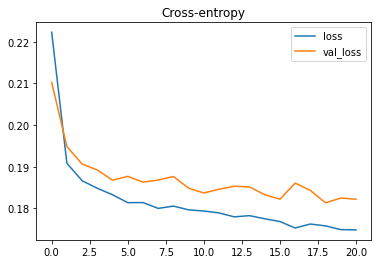

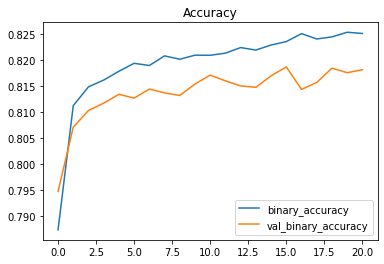

In [12]:

# Definir el modelo del diagrama
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1,'sigmoid'),
])

#No hay cambios en el entrenamiento
model.compile(
    optimizer='adam',
    loss='mae',
    metrics = [keras.metrics.BinaryAccuracy()]
)

###### Compile el modelo con un optimizador Adm y versiones binarias del cross entropy y accuracy
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
    
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)
#######

# Mostrar las curvas de aprendizaje
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

**Paso 4:** Añadir optimizer, loss y métricas

Compile el modelo con un optimizador Adm y versiones binarias del cross entropy y accuracy

**Paso 5:** Entrenar el modelo y ver las curvas de aprendizaje

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

**Paso 6:** Evaluar

¿Qué piensa de las curvas de aprendizaje?
¿El modelo está sobreentrenado o le falta entrenamiento?
¿Está bien el cross-entropy y el accuracy?

#Visualizar una ANN

In [ ]:
#Cargar utils
from tensorflow.keras.utils import plot_model

#Visualizar el modelo
plot_model (model, to_file ='modelo.png', show_shapes=True) #Ver la diferencia 